In [1]:
# Reference:
# https://note.com/scilabcafe/n/n3356c193f386
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

In [2]:
symbol = '^N225'
ticker = yf.Ticker(symbol)
df = ticker.history(period='1y')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-14 00:00:00+09:00,32456.720703,32613.990234,32031.539062,32059.910156,95600000,0.0,0.0
2023-08-15 00:00:00+09:00,32372.529297,32403.929688,32217.519531,32238.890625,75100000,0.0,0.0
2023-08-16 00:00:00+09:00,31965.580078,31997.279297,31766.820312,31766.820312,84800000,0.0,0.0
2023-08-17 00:00:00+09:00,31621.980469,31704.080078,31309.679688,31626.000000,87700000,0.0,0.0
2023-08-18 00:00:00+09:00,31321.259766,31644.890625,31275.250000,31450.759766,74800000,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-07 00:00:00+09:00,34122.351562,35849.769531,33739.460938,35089.621094,242800000,0.0,0.0
2024-08-08 00:00:00+09:00,34645.789062,35379.648438,34207.160156,34831.148438,165300000,0.0,0.0
2024-08-09 00:00:00+09:00,35272.339844,35671.308594,34445.570312,35025.000000,176900000,0.0,0.0


In [3]:
# 基準線に使用するデータを作成
high = df['High']
low = df['Low']

max26 = high.rolling(window=26).max()
min26 = low.rolling(window=26).min()
df['basic_line'] = (max26 + min26) / 2

# 転換線に使用するデータを作成
high9 = high.rolling(window=9).max()
low9 = low.rolling(window=9).min()
df['turn_line'] = (high9 + low9) / 2

# 先行スパン１に使用するデータを作成
span1 = (df['basic_line'] + df['turn_line']) / 2
df['span1'] = span1.shift(25)

# 先行スパン２に使用するデータを作成
high52 = high.rolling(window=52).max()
low52 = low.rolling(window=52).min()
span2 = (high52 + low52) / 2
df['span2'] = span2.shift(25)

# 遅行線に使用するデータを作成
df['slow_line'] = df['Close'].shift(-25)

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,basic_line,turn_line,span1,span2,slow_line
Date,,,,,,,,,,,,
2023-08-14 00:00:00+09:00,32456.720703,32613.990234,32031.539062,32059.910156,95600000,0.0,0.0,NaN,NaN,NaN,NaN,33242.589844
2023-08-15 00:00:00+09:00,32372.529297,32403.929688,32217.519531,32238.890625,75100000,0.0,0.0,NaN,NaN,NaN,NaN,33023.781250
2023-08-16 00:00:00+09:00,31965.580078,31997.279297,31766.820312,31766.820312,84800000,0.0,0.0,NaN,NaN,NaN,NaN,32571.029297
2023-08-17 00:00:00+09:00,31621.980469,31704.080078,31309.679688,31626.000000,87700000,0.0,0.0,NaN,NaN,NaN,NaN,32402.410156
2023-08-18 00:00:00+09:00,31321.259766,31644.890625,31275.250000,31450.759766,74800000,0.0,0.0,NaN,NaN,NaN,NaN,32678.619141
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-07 00:00:00+09:00,34122.351562,35849.769531,33739.460938,35089.621094,242800000,0.0,0.0,36791.444336,35172.245117,39026.759766,38423.269531,NaN
2024-08-08 00:00:00+09:00,34645.789062,35379.648438,34207.160156,34831.148438,165300000,0.0,0.0,36791.444336,35172.245117,39355.373047,38713.634766,NaN
2024-08-09 00:00:00+09:00,35272.339844,35671.308594,34445.570312,35025.000000,176900000,0.0,0.0,36791.444336,35172.245117,39493.882812,38852.144531,NaN


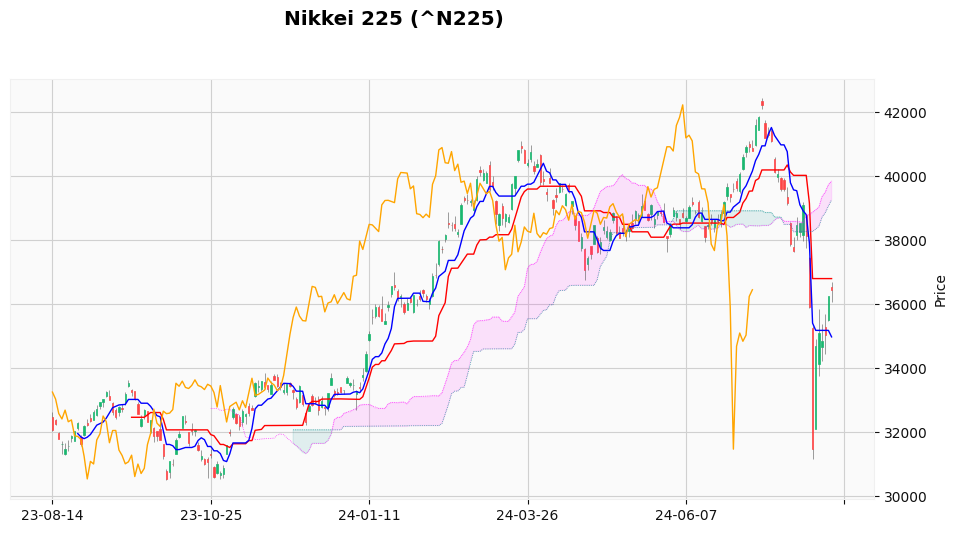

In [4]:
# 基準線に使用するデータを作成
high = df['High']
low = df['Low']


max26 = high.rolling(window=26).max()
min26 = low.rolling(window=26).min()
df['basic_line'] = (max26 + min26) / 2


# 転換線に使用するデータを作成
high9 = high.rolling(window=9).max()
low9 = low.rolling(window=9).min()
df['turn_line'] = (high9 + low9) / 2


# 先行スパン１に使用するデータを作成
span1 = (df['basic_line'] + df['turn_line']) / 2
df['span1'] = span1.shift(25)


# 先行スパン2に使用するデータを作成
high52 = high.rolling(window=52).max()
low52 = low.rolling(window=52).min()
span2 = (high52 + low52) / 2
df['span2'] = span2.shift(25)


# 遅行線に使用するデータを作成
df['slow_line'] = df['Close'].shift(-25)

apd = [
    mpf.make_addplot(df['basic_line'], color='red', width=1),                       # 基準線
    mpf.make_addplot(df['turn_line'], color='blue', width=1),                       # 転換線
    mpf.make_addplot(df['span1'], color='magenta', linestyle='dotted', width=0.5),  # 先行スパン１
    mpf.make_addplot(df['span2'], color='darkcyan', linestyle='dotted', width=0.5), # 先行スパン２
    mpf.make_addplot(df['slow_line'], color='orange', width=1),                     # 遅行スパン
]

labels = ['basic', 'turn', 'span1', 'span2', 'slow']

# 抵抗帯（雲）
# 先行スパン１ (span1) が上にある雲（マゼンタ）と、先行スパン２ (span2) が上にある雲（シアン）の２種類に分ける。
y1 = df['span1'].values
y2 = df['span2'].values
fb_span1 = dict(y1=y1, y2=y2, where=y1>y2, alpha=0.1, color='magenta', interpolate=True)
fb_span2 = dict(y1=y1, y2=y2, where=y1<y2, alpha=0.1, color='darkcyan', interpolate=True)
fb_span_both = [fb_span1, fb_span2]

title = '%s (%s)' % (
    ticker.info['longName'],
    ticker.info['symbol'],
)

# チャートを表示
mpf.plot(
    df,
    title=title,
    type='candle',
    style='yahoo',
    datetime_format='%y-%m-%d',
    xrotation=0,
    addplot=apd,
    returnfig=True,
    fill_between=fb_span_both,
    figsize=(12, 6),
    #tight_layout=True,
)

#plt.savefig('n255_ichimoku.png')
# チャートを表示
plt.show()